In [1]:
# importing Libraries and having plots on defining plot showing in notebook.
%matplotlib inline
from collections import Counter
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

# the more advanced python visualization library
import seaborn as sns

# apply style to all the charts
sns.set_style('whitegrid')

# setting decimal numbers to two decimals only
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# I want to load two tables. The merged, and the clean movie table.
df_merge_ratingcleaned = pd.read_csv(r'C:\Users\Alka.Patel\CEBD 1260\Project\Data\Processed\df_merge_ratingcleaned.csv')

df_merge_keyword = pd.read_csv(r'C:\Users\Alka.Patel\CEBD 1260\Project\Data\Processed\df_merge_keyword.csv')


# One variable Analysis

In [3]:
df_merge_keyword.head()


,budget,genres,movieId,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,keywords
0,30000000.00,"['Animation', 'Comedy', 'Family']",862,en,Toy Story,21.95,['Pixar Animation Studios'],['United States of America'],1995-10-30,373554033.00,81.00,Toy Story,7.70,5415.00,"['jealousy', 'toy', 'boy', 'friendship', 'frie..."
1,65000000.00,"['Adventure', 'Fantasy', 'Family']",8844,en,Jumanji,17.02,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],1995-12-15,262797249.00,104.00,Jumanji,6.90,2413.00,"['board game', 'disappearance', ""based on chil..."
2,0.00,"['Romance', 'Comedy']",15602,en,Grumpier Old Men,11.71,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],1995-12-22,0.00,101.00,Grumpier Old Men,6.50,92.00,"['fishing', 'best friend', 'duringcreditssting..."
3,16000000.00,"['Comedy', 'Drama', 'Romance']",31357,en,Waiting to Exhale,3.86,['Twentieth Century Fox Film Corporation'],['United States of America'],1995-12-22,81452156.00,127.00,Waiting to Exhale,6.10,34.00,"['based on novel', 'interracial relationship',..."
4,0.00,['Comedy'],11862,en,Father of the Bride Part II,8.39,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],1995-02-10,76578911.00,106.00,Father of the Bride Part II,5.70,173.00,"['baby', 'midlife crisis', 'confidence', 'agin..."


In [4]:
print(df_merge_keyword.shape)

(42074, 15)


## Common Genre Analysis

In [5]:
#Splitting words

genres2=list(df_merge_keyword["genres"].apply(lambda x: x.split(" ")))

#flattening list
genres2= [x for y in genres2 for x in y]

# print(genres)
#Making lower case
genres=[x.lower() for x in genres2]

#stripping punctuations
import string

genres2 = [''.join(c for c in s if c not in string.punctuation) for s in genres2]

#Getting rid of all spaces
genres2 = [x for x in genres2 if x.strip()]

#Using counter to count occurances
genres_count=(Counter(genres2).most_common())

for key, value in (genres_count):
    print(key, ":", value)

Drama : 18381
Comedy : 12199
Thriller : 7229
Romance : 6332
Action : 6160
Horror : 4536
Crime : 4020
Documentary : 3760
Adventure : 3362
Science : 2985
Fiction : 2985
Family : 2588
Mystery : 2368
Fantasy : 2177
Animation : 1870
Music : 1534
Foreign : 1393
History : 1288
War : 1194
Western : 1037
TV : 761
Movie : 761


## Common Languages Analysis

In [6]:
#See movie breakup by language
popular_language_breakdown=df_merge_keyword.groupby(by='original_language')['title'].count()
popular_language_breakdown=popular_language_breakdown.sort_values(ascending=False)
print(popular_language_breakdown)

original_language
en    32464
fr     2467
it     1482
ja     1400
de     1048
es      988
ru      811
hi      526
ko      472
zh      416
Name: title, dtype: int64


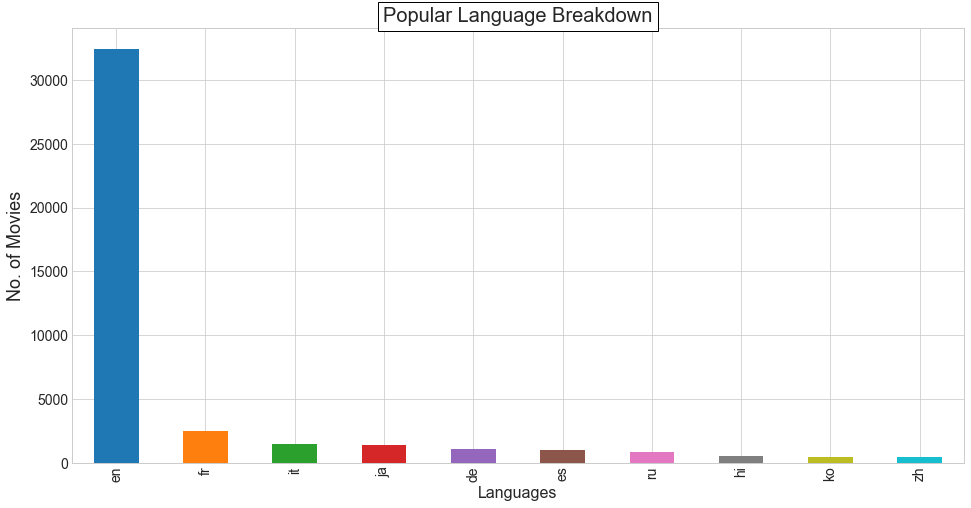

In [7]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 8]
popular_language_breakdown.plot(kind='bar')
plt.title("Popular Language Breakdown", bbox={'facecolor':'1', 'pad':5}, fontsize=20)
plt.ylabel("No. of Movies",fontsize=18)
plt.xlabel("Languages", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)


Analysis of English versus all other Languages

In [8]:
#Analysis of English versus all other Languages
popular_languages_2=df_merge_keyword.replace(['fr','it','ja','de','es','ru','hi','ko','zh'],'others')


In [9]:
popular_language_breakdown_2=popular_languages_2.groupby(by='original_language')['title'].count()
popular_language_breakdown_2=popular_language_breakdown_2.sort_values(ascending=False)
print(popular_language_breakdown_2)

original_language
en        32464
others     9610
Name: title, dtype: int64


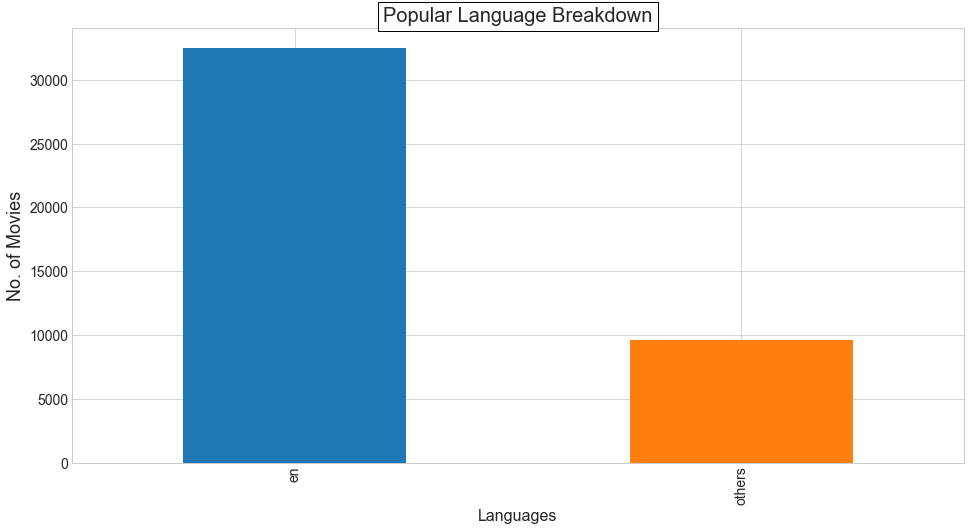

In [10]:
plt.rcParams['figure.figsize'] = [16, 8]
popular_language_breakdown_2.plot(kind='bar')
plt.title("Popular Language Breakdown", bbox={'facecolor':'1', 'pad':5}, fontsize=20)
plt.ylabel("No. of Movies",fontsize=18)
plt.xlabel("Languages", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)


## Revenue of Movies

Let's Analyze the Revenue for the Movie Revenues.

0.00            34840
10000000.00        19
11000000.00        18
2000000.00         18
12000000.00        17
6000000.00         15
5000000.00         14
8000000.00         13
1.00               12
500000.00          11
7000000.00         11
1000000.00         10
20000000.00        10
3000000.00         10
4000000.00          9
14000000.00         9
25000000.00         8
4100000.00          8
1500000.00          7
25.00               7
4300000.00          7
13000000.00         7
2500000.00          7
30000000.00         7
16000000.00         6
3.00                6
9000000.00          6
15000000.00         6
18000000.00         5
60000000.00         5
                ...  
20246790.00         1
7683267.00          1
24441725.00         1
391081192.00        1
5965.00             1
131282949.00        1
23859.00            1
114501299.00        1
566611.00           1
72527595.00         1
80916492.00         1
161834276.00        1
245724603.00        1
12212123.00         1
8203235.00

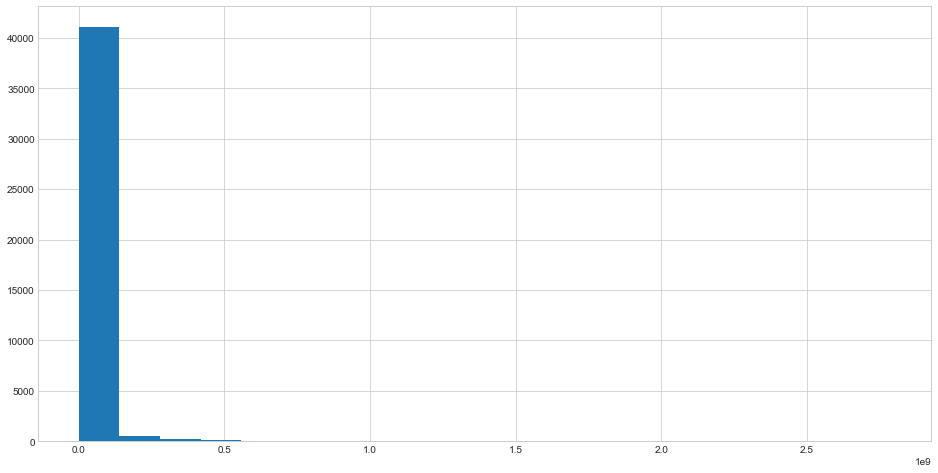

In [11]:
print(df_merge_keyword['revenue'].value_counts())
print('mean', np.mean(df_merge_keyword['revenue']))
print('std', np.std(df_merge_keyword['revenue']))
plt.hist(df_merge_keyword['revenue'], bins=20)
plt.show()

So here we see that revenue is very spread out, so we need to break this up in groups to ge a better view of the revenue. We will break it up with revenue = 0, revenue between 0 and 200, 000, 000, and revenue greater 200, 000, 000.

0.00    34840
Name: revenue, dtype: int64
mean 0.0
std 0.0
max 0.0
min 0.0
total length (34840,)


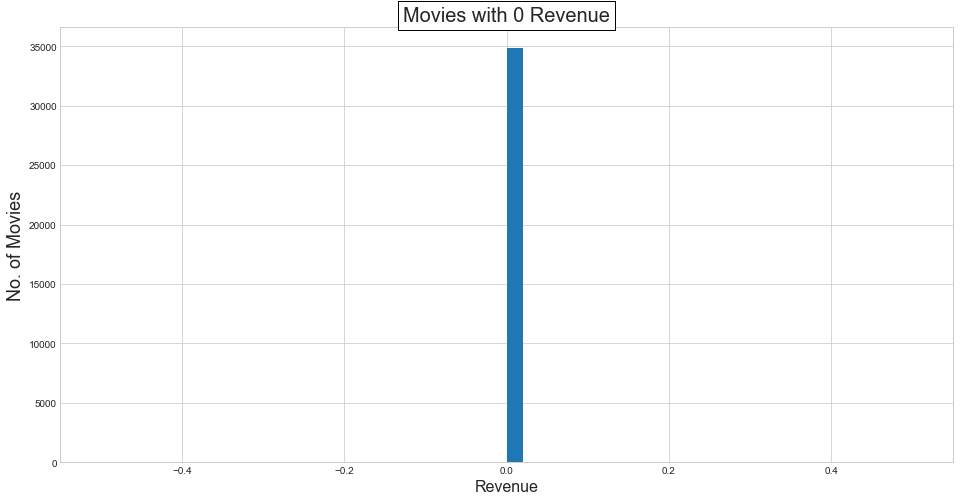

In [12]:
#Revenue = 0
df_movie_revenue_z=df_merge_keyword[(df_merge_keyword['revenue'] == 0)]
plt.rcParams['figure.figsize'] = [16, 8]

print(df_movie_revenue_z['revenue'].value_counts()) 
print('mean', np.mean(df_movie_revenue_z['revenue']))
print('std', np.std(df_movie_revenue_z['revenue']))
print('max', np.max(df_movie_revenue_z['revenue']))
print('min', np.min(df_movie_revenue_z['revenue']))
print('total length', df_movie_revenue_z['revenue'].shape)

plt.hist(df_movie_revenue_z['revenue'], bins=50)
plt.title("Movies with 0 Revenue", bbox={'facecolor':'1', 'pad':5}, fontsize=20)
plt.ylabel("No. of Movies",fontsize=18)
plt.xlabel("Revenue", fontsize=16)
plt.show()

10000000.00     19
11000000.00     18
2000000.00      18
12000000.00     17
6000000.00      15
5000000.00      14
8000000.00      13
1.00            12
500000.00       11
7000000.00      11
1000000.00      10
20000000.00     10
3000000.00      10
14000000.00      9
4000000.00       9
4100000.00       8
25000000.00      8
13000000.00      7
2500000.00       7
1500000.00       7
25.00            7
4300000.00       7
30000000.00      7
15000000.00      6
3.00             6
16000000.00      6
9000000.00       6
60000000.00      5
18000000.00      5
5.00             5
                ..
55534455.00      1
4817642.00       1
5300.00          1
704000.00        1
90874570.00      1
9524340.00       1
1501785.00       1
40716963.00      1
49627779.00      1
182857.00        1
10047674.00      1
7972967.00       1
21930418.00      1
44909486.00      1
1878561.00       1
791830.00        1
133821816.00     1
67800064.00      1
32416586.00      1
97918663.00      1
3396726.00       1
1262091.00  

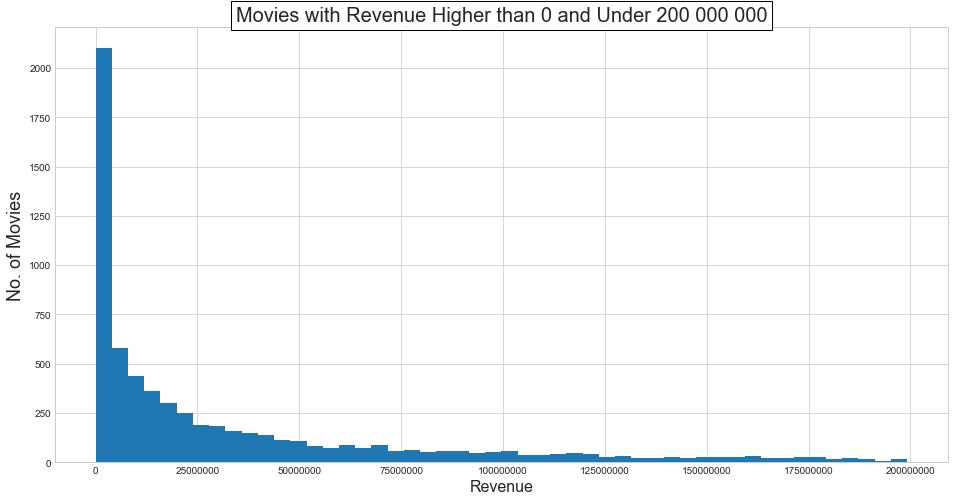

In [13]:
#Revenue between 0 and 200 000 000
df_movie_revenue_between=df_merge_keyword[(df_merge_keyword['revenue'] > 0) & (df_merge_keyword['revenue'] < 200000000)]


plt.rcParams['figure.figsize'] = [16, 8]

print(df_movie_revenue_between['revenue'].value_counts()) 
print('mean', np.mean(df_movie_revenue_between['revenue']))
print('std', np.std(df_movie_revenue_between['revenue']))
print('max', np.max(df_movie_revenue_between['revenue']))
print('min', np.min(df_movie_revenue_between['revenue']))
print('total length', df_movie_revenue_between['revenue'].shape)

plt.hist(df_movie_revenue_between['revenue'], bins=50)
plt.title("Movies with Revenue Higher than 0 and Under 200 000 000", bbox={'facecolor':'1', 'pad':5}, fontsize=20)
plt.ylabel("No. of Movies",fontsize=18)
plt.xlabel("Revenue", fontsize=16)
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()


207945075.00     2
205754447.00     2
278300000.00     2
521170825.00     2
1023784195.00    2
498814908.00     1
244931766.00     1
422610419.00     1
362000072.00     1
233755553.00     1
543513985.00     1
325233863.00     1
924317558.00     1
362744280.00     1
317375031.00     1
325756637.00     1
311256926.00     1
591739379.00     1
425368238.00     1
368744044.00     1
306941670.00     1
660940780.00     1
863416141.00     1
234710455.00     1
1238764765.00    1
752215857.00     1
591794936.00     1
274925095.00     1
926287400.00     1
276572938.00     1
                ..
235666219.00     1
325771424.00     1
714766572.00     1
321731527.00     1
497366869.00     1
407711549.00     1
240031094.00     1
821708551.00     1
381509870.00     1
426480871.00     1
435000000.00     1
224834564.00     1
300257475.00     1
319131050.00     1
919838758.00     1
215663859.00     1
677718395.00     1
783112979.00     1
392000694.00     1
238207122.00     1
441286195.00     1
202292902.00

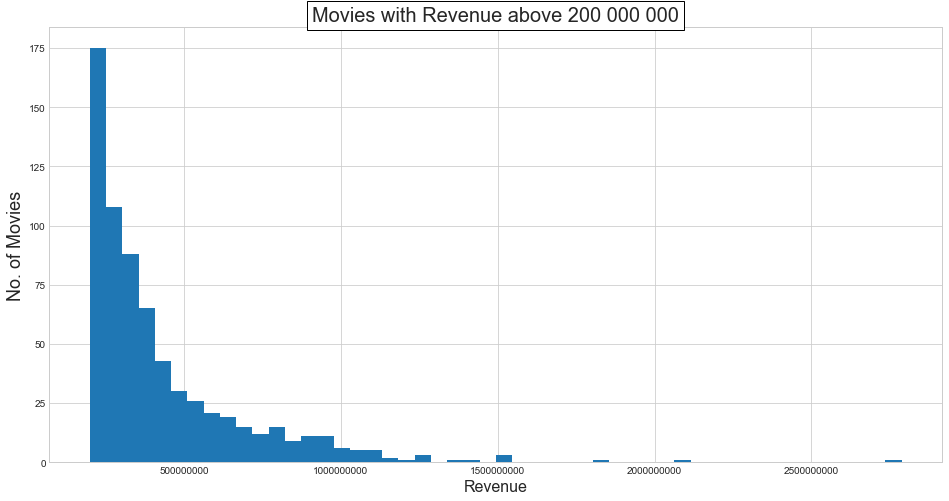

In [14]:
#Revenue between above 200 000 000
df_movie_revenue_highest=df_merge_keyword[(df_merge_keyword['revenue'] >= 200000000)]


plt.rcParams['figure.figsize'] = [16, 8]

print(df_movie_revenue_highest['revenue'].value_counts()) 
print('mean', np.mean(df_movie_revenue_highest['revenue']))
print('std', np.std(df_movie_revenue_highest['revenue']))
print('max', np.max(df_movie_revenue_highest['revenue']))
print('min', np.min(df_movie_revenue_highest['revenue']))
print('total length', df_movie_revenue_highest['revenue'].shape)

plt.hist(df_movie_revenue_highest['revenue'], bins=50)
plt.title("Movies with Revenue above 200 000 000", bbox={'facecolor':'1', 'pad':5}, fontsize=20)
plt.ylabel("No. of Movies",fontsize=18)
plt.xlabel("Revenue", fontsize=16)
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

0.00    33546
Name: budget, dtype: int64
mean 0.0
std 0.0
max 0.0
min 0.0
total length (33546,)


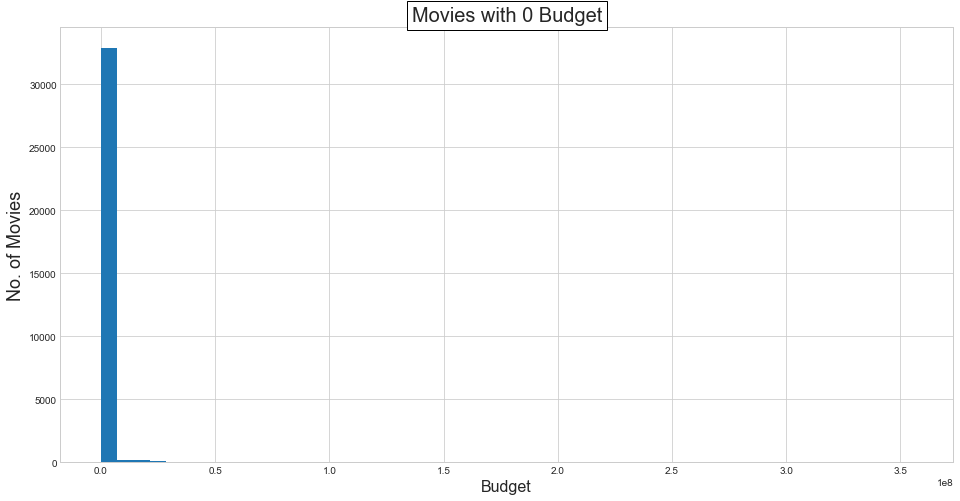

In [15]:
#Budget _ Important to do the same exploration with budget


#Budget = 0
df_movie_budget_z=df_merge_keyword[(df_merge_keyword['budget'] == 0)]
plt.rcParams['figure.figsize'] = [16, 8]

print(df_movie_budget_z['budget'].value_counts()) 
print('mean', np.mean(df_movie_budget_z['budget']))
print('std', np.std(df_movie_budget_z['budget']))
print('max', np.max(df_movie_budget_z['budget']))
print('min', np.min(df_movie_budget_z['budget']))
print('total length', df_movie_budget_z['budget'].shape)

plt.hist(df_movie_budget_z['revenue'], bins=50)
plt.title("Movies with 0 Budget", bbox={'facecolor':'1', 'pad':5}, fontsize=20)
plt.ylabel("No. of Movies",fontsize=18)
plt.xlabel("Budget", fontsize=16)
plt.show()

5000000.00     283
10000000.00    261
20000000.00    247
15000000.00    224
2000000.00     218
3000000.00     213
25000000.00    205
30000000.00    192
1000000.00     185
4000000.00     170
40000000.00    169
6000000.00     168
12000000.00    168
8000000.00     154
35000000.00    142
7000000.00     137
500000.00      133
50000000.00    124
60000000.00    111
1500000.00     107
18000000.00    103
3500000.00      96
2500000.00      92
13000000.00     88
9000000.00      87
11000000.00     83
14000000.00     75
16000000.00     74
17000000.00     70
22000000.00     70
              ... 
373000.00        1
10100000.00      1
6229577.00       1
8520000.00       1
4531653.00       1
463455.00        1
8806000.00       1
567000.00        1
2791874.00       1
42500.00         1
829000.00        1
295000.00        1
927262.00        1
240000.00        1
747000.00        1
3774400.00       1
145786.00        1
16670000.00      1
79000.00         1
176000.00        1
878000.00        1
49900000.00 

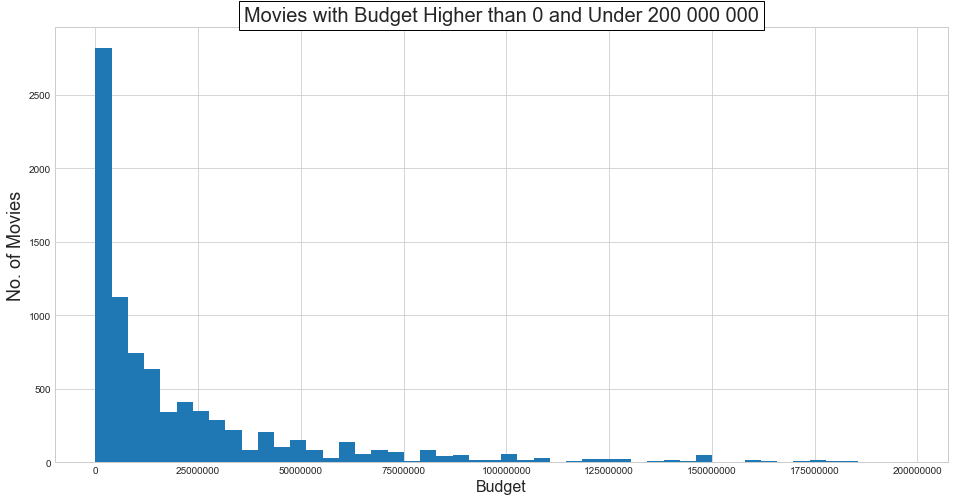

In [16]:
#Budget between 0 and 200 000 000
df_movie_budget_between=df_merge_keyword[(df_merge_keyword['budget'] > 0) & (df_merge_keyword['budget'] < 200000000)]


plt.rcParams['figure.figsize'] = [16, 8]

print(df_movie_budget_between['budget'].value_counts()) 
print('mean', np.mean(df_movie_budget_between['budget']))
print('std', np.std(df_movie_budget_between['budget']))
print('max', np.max(df_movie_budget_between['budget']))
print('min', np.min(df_movie_budget_between['budget']))
print('total length', df_movie_budget_between['budget'].shape)

plt.hist(df_movie_budget_between['budget'], bins=50)
plt.title("Movies with Budget Higher than 0 and Under 200 000 000", bbox={'facecolor':'1', 'pad':5}, fontsize=20)
plt.ylabel("No. of Movies",fontsize=18)
plt.xlabel("Budget", fontsize=16)
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

200000000.00    23
250000000.00    10
225000000.00     3
260000000.00     3
245000000.00     2
210000000.00     2
380000000.00     1
300000000.00     1
215000000.00     1
280000000.00     1
209000000.00     1
237000000.00     1
220000000.00     1
207000000.00     1
270000000.00     1
230000000.00     1
258000000.00     1
255000000.00     1
Name: budget, dtype: int64
mean 227745454.54545453
std 33763465.02135012
max 380000000.0
min 200000000.0
total length (55,)


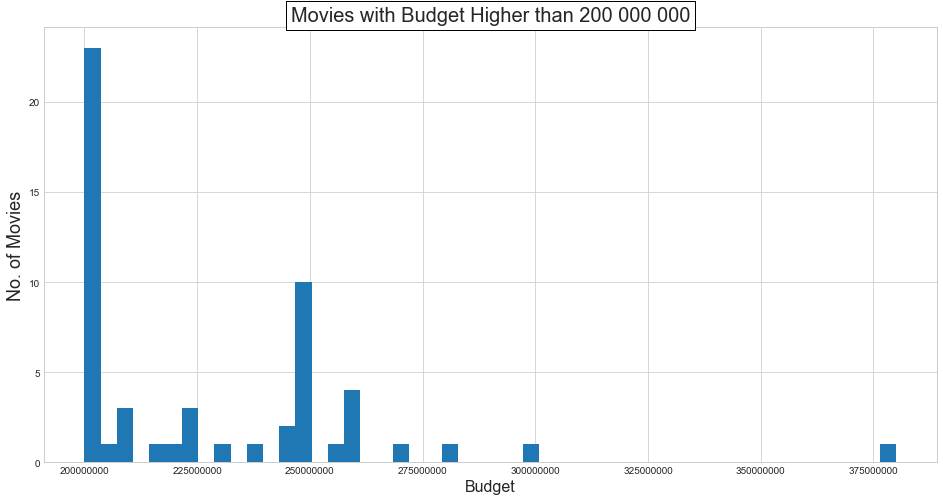

In [17]:
#Budget higher than 200 000 000
df_movie_budget_between=df_merge_keyword[(df_merge_keyword['budget'] >= 200000000)]


plt.rcParams['figure.figsize'] = [16, 8]

print(df_movie_budget_between['budget'].value_counts()) 
print('mean', np.mean(df_movie_budget_between['budget']))
print('std', np.std(df_movie_budget_between['budget']))
print('max', np.max(df_movie_budget_between['budget']))
print('min', np.min(df_movie_budget_between['budget']))
print('total length', df_movie_budget_between['budget'].shape)

plt.hist(df_movie_budget_between['budget'], bins=50)
plt.title("Movies with Budget Higher than 200 000 000", bbox={'facecolor':'1', 'pad':5}, fontsize=20)
plt.ylabel("No. of Movies",fontsize=18)
plt.xlabel("Budget", fontsize=16)
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

# Multiple Variable Analysis

We can see that there are many 0s, that probably means, that instead of null, missing values were represented by 0. 
Or there were many movies with 0 budget or low budget. Or there were errors in entry. Like when you see numbers like
1 and 3, some values were not entered properly. I will remove anything with a revenue and budget under 1000. For the sake of this assingment, I would consider a movie of a revenue of over 1000, successful. However, we could have done all the analysis in categories such as low budget/low revenue, medium budget/medium revenue and high budget/high revenue. For this assingment, I am just segmenting as over 1000 as a threshold. In the end, we will see how many rows we are left with. With the heat map, I will also try to prove that the correlations trends are similar between this segment and the bigger dataset.

In [40]:
#Cleaning revenue

df_movie_revenue=df_merge_keyword[(df_merge_keyword['revenue'] > 1000)]


print(df_movie_revenue['revenue'].shape)
print('mean', np.mean(df_movie_revenue['revenue']))
print('std', np.std(df_movie_revenue['revenue']))
print('max', np.max(df_movie_revenue['revenue']))
print('min', np.min(df_movie_revenue['revenue']))

(7087,)
mean 71968764.86496402
std 149543603.82899314
max 2787965087.0
min 1081.0


In [42]:
# Again dropping anything lower than 1000 for budget from the fixed revenue table

df_movie_fixed=df_movie_revenue[(df_movie_revenue['budget'] > 1000)]

'''
Let us see if there is a correlation between the numberic columns of the movies metadata.
However to do that, I will also drop all columns with outlier budgets.
'''

print(df_movie_fixed.shape)

df_movie_fixed.to_csv(r"C:\Users\Alka.Patel\CEBD 1260\Project\Data\Processed\df_movie_fixed.csv", index = False, header = True)



(5220, 15)


# In this fixed table, we only have 5220 rows of 42074 rows left from the original table. That is a 12%. Not very representative

## Heatmap of Fixed Revene and Budget Data Set

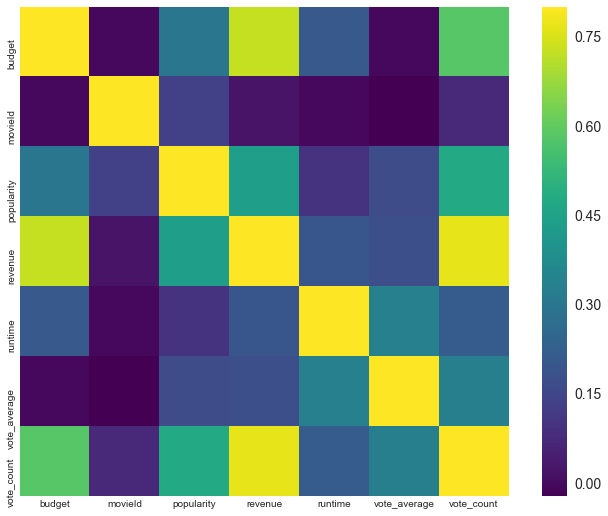

In [20]:
# heatmap

corrmat = df_movie_fixed.corr()
plt.rcParams['figure.figsize'] = [11, 11]
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.4)
sns.heatmap(corrmat, vmax=.8, square=True, cmap="viridis")

plt.show()

In [21]:
df_movie_fixed.corr()

,budget,movieId,popularity,revenue,runtime,vote_average,vote_count
budget,1.00,-0.00,0.30,0.73,0.20,-0.00,0.58
movieId,-0.00,1.00,0.13,0.02,-0.01,-0.02,0.07
popularity,0.30,0.13,1.00,0.44,0.10,0.17,0.48
revenue,0.73,0.02,0.44,1.00,0.20,0.18,0.77
runtime,0.20,-0.01,0.10,0.20,1.00,0.33,0.21
vote_average,-0.00,-0.02,0.17,0.18,0.33,1.00,0.33
vote_count,0.58,0.07,0.48,0.77,0.21,0.33,1.00


The only correlations are between budget and revenue; vote_count and revenue; vote_count and budget; and vote_count and popularity.

# Heatmap of Original Merged Table

For curiousity sake, I also want to try the same on the table without the dropped budgets and revenues. The original Table:

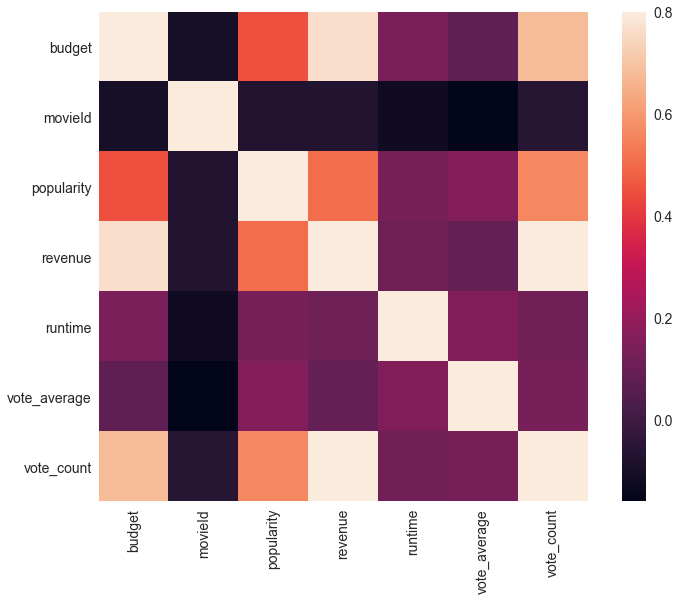

,budget,movieId,popularity,revenue,runtime,vote_average,vote_count
budget,1.00,-0.10,0.45,0.77,0.14,0.08,0.68
movieId,-0.10,1.00,-0.08,-0.07,-0.12,-0.16,-0.06
popularity,0.45,-0.08,1.00,0.51,0.13,0.16,0.56
revenue,0.77,-0.07,0.51,1.00,0.11,0.09,0.81
runtime,0.14,-0.12,0.13,0.11,1.00,0.15,0.12
vote_average,0.08,-0.16,0.16,0.09,0.15,1.00,0.13
vote_count,0.68,-0.06,0.56,0.81,0.12,0.13,1.00


In [22]:
# heatmap of original table

corrmat = df_merge_keyword.corr()
plt.rcParams['figure.figsize'] = [11, 11]
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.4)
sns.heatmap(corrmat, vmax=.8, square=True,)
plt.show()

df_merge_keyword.corr()

In the original table, we can see that there is a correlation between revenue and vote_count. So the sample was kind of representative. There is also a correlation, again between renvenue and budget; between vote_count and revenue; and vote_count and popularity.

# Heatmap of Rating Merged Table

Since we are having fun with heat maps, I also want to try a heat map with the rating merged table, to see if there is 
of interest there.

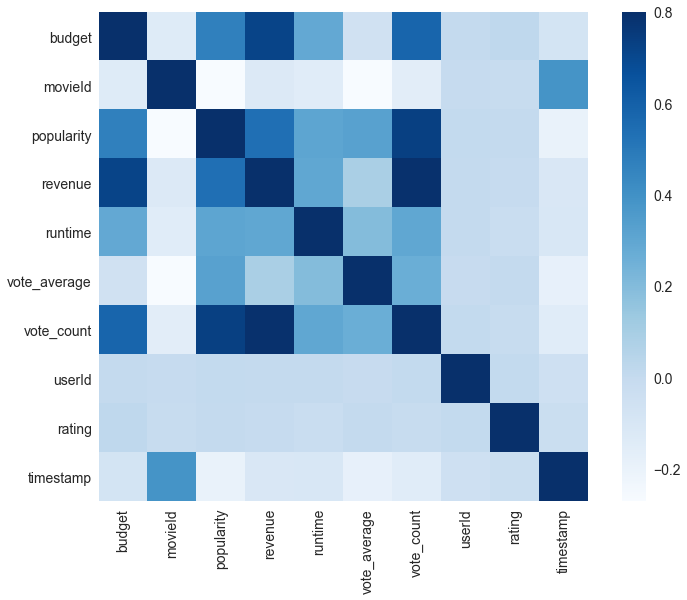

,budget,movieId,popularity,revenue,runtime,vote_average,vote_count,userId,rating,timestamp
budget,1.00,-0.13,0.47,0.72,0.29,-0.06,0.58,0.01,0.02,-0.08
movieId,-0.13,1.00,-0.27,-0.12,-0.15,-0.27,-0.15,-0.00,-0.01,0.39
popularity,0.47,-0.27,1.00,0.54,0.31,0.33,0.74,0.01,0.00,-0.19
revenue,0.72,-0.12,0.54,1.00,0.30,0.09,0.79,0.00,-0.00,-0.11
runtime,0.29,-0.15,0.31,0.30,1.00,0.20,0.30,0.01,-0.02,-0.10
vote_average,-0.06,-0.27,0.33,0.09,0.20,1.00,0.27,-0.01,0.00,-0.18
vote_count,0.58,-0.15,0.74,0.79,0.30,0.27,1.00,0.01,-0.01,-0.15
userId,0.01,-0.00,0.01,0.00,0.01,-0.01,0.01,1.00,0.01,-0.05
rating,0.02,-0.01,0.00,-0.00,-0.02,0.00,-0.01,0.01,1.00,-0.02
timestamp,-0.08,0.39,-0.19,-0.11,-0.10,-0.18,-0.15,-0.05,-0.02,1.00


In [23]:
df_merge_ratingcleaned

corrmat = df_merge_ratingcleaned.corr()
plt.rcParams['figure.figsize'] = [11, 11]
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.4)
sns.heatmap(corrmat, vmax=.8, square=True, cmap="Blues")
plt.show()

df_merge_ratingcleaned.corr()

I see the same correlations as the above 2 heatmaps.

## Grouplens Rating and Revenue

In [24]:
df_rating_analysis=df_merge_ratingcleaned.groupby(by=['movieId'])['rating'].mean().sort_values()
df_rating_analysis

movieId
54910   0.50
70121   0.50
7093    0.50
69974   0.50
88950   0.50
54768   0.50
61348   0.50
6644    0.50
27857   0.50
48591   0.50
48522   0.50
8963    0.50
5521    0.50
26009   0.50
8859    0.50
63540   0.50
27376   0.50
80350   0.50
5413    0.50
66066   0.50
8290    0.50
2191    0.50
66659   0.50
39408   0.50
3933    0.50
3574    0.75
1826    0.75
4104    0.75
2516    0.75
42721   1.00
        ... 
4442    5.00
8675    5.00
559     5.00
8208    5.00
36931   5.00
702     5.00
759     5.00
91690   5.00
91673   5.00
764     5.00
90061   5.00
820     5.00
845     5.00
40226   5.00
6163    5.00
872     5.00
6107    5.00
5765    5.00
43267   5.00
5071    5.00
5062    5.00
4930    5.00
4822    5.00
4789    5.00
4584    5.00
961     5.00
80717   5.00
4459    5.00
4252    5.00
26843   5.00
Name: rating, Length: 2674, dtype: float64

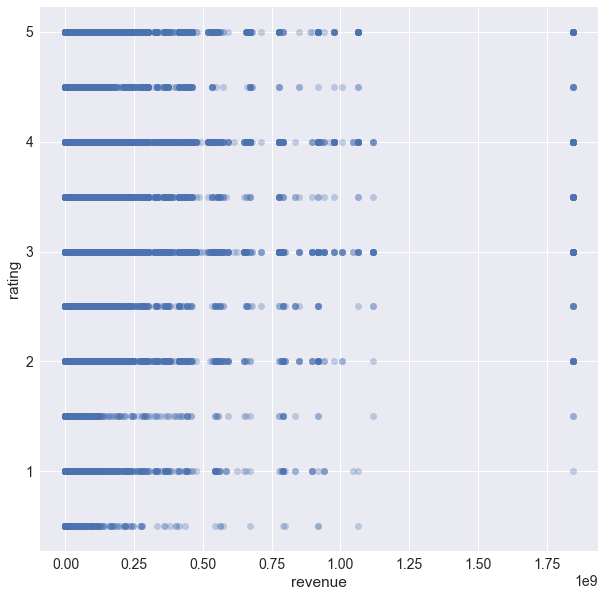

In [25]:
'''
I would like to see in detail the correlation between revenue and the ratings from grouplens.
'''

#Visualization: correlation between Revenue and Rating
plt.figure(figsize=(10,10))
plt.xlabel('revenue')
plt.ylabel('rating')

plt.plot(df_merge_ratingcleaned['revenue'], df_merge_ratingcleaned['rating'], 'o', alpha=0.3)
plt.show()

So as we saw on the heatmap, the rating does not have correlation with revenue. But we must remember that this dataset only had over 2000 videos.

# Correlation between production countries and original language

This is a messy task, as I do not know how to manage with multiple production countries for one movie....

## Pivot Table

In [26]:
df_movie_fixed.pivot_table(index='production_countries', columns='original_language', values='vote_average', aggfunc=np.mean)

original_language,de,en,es,fr,hi,it,ja,ko,ru,zh
production_countries,,,,,,,,,,
"['Algeria', 'France', 'Morocco', 'Belgium']",nan,nan,nan,6.70,nan,nan,nan,nan,nan,nan
"['Argentina', 'Colombia', 'Venezuela']",nan,nan,7.80,nan,nan,nan,nan,nan,nan,nan
"['Argentina', 'Denmark', 'Finland', 'France', 'Germany', 'Iceland', 'Italy', 'Netherlands', 'Norway', 'Sweden', 'United Kingdom', 'United States of America']",nan,7.70,nan,nan,nan,nan,nan,nan,nan,nan
"['Argentina', 'France', 'Spain']",nan,nan,6.10,nan,nan,nan,nan,nan,nan,nan
"['Argentina', 'France', 'United Kingdom']",nan,4.50,nan,nan,nan,nan,nan,nan,nan,nan
"['Argentina', 'Spain', 'Italy', 'United States of America']",nan,6.70,nan,nan,nan,nan,nan,nan,nan,nan
"['Argentina', 'Spain']",nan,nan,6.90,nan,nan,nan,nan,nan,nan,nan
"['Argentina', 'United Kingdom']",nan,6.90,nan,nan,nan,nan,nan,nan,nan,nan
"['Australia', 'Canada', 'China', 'Hong Kong', 'United States of America']",nan,5.80,nan,nan,nan,nan,nan,nan,nan,nan


From this table, we can see the average vote count of movies of a certain language for groups of production countries. I kind of wish I had more granular data and the votes per language per country. But I thought it was interesting to see and I wanted to explore a pivot table.

# Business Perspective

# What is the total number of releases per year? 

# Descriptive

In [27]:
df_movie_fixed['release_date']=pd.to_datetime(df_movie_fixed['release_date'])

C:\Users\Alka.Patel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


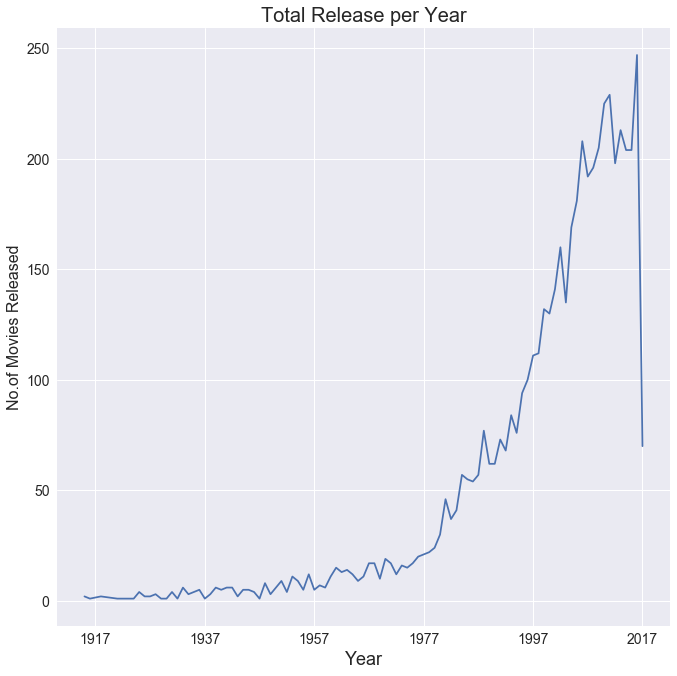

release_date
1915-01-01      2
1916-01-01      1
1918-01-01      2
1921-01-01      1
1922-01-01      1
1924-01-01      1
1925-01-01      4
1926-01-01      2
1927-01-01      2
1928-01-01      3
1929-01-01      1
1930-01-01      1
1931-01-01      4
1932-01-01      1
1933-01-01      6
1934-01-01      3
1935-01-01      4
1936-01-01      5
1937-01-01      1
1938-01-01      3
1939-01-01      6
1940-01-01      5
1941-01-01      6
1942-01-01      6
1943-01-01      2
1944-01-01      5
1945-01-01      5
1946-01-01      4
1947-01-01      1
1948-01-01      8
             ... 
1988-01-01     77
1989-01-01     62
1990-01-01     62
1991-01-01     73
1992-01-01     68
1993-01-01     84
1994-01-01     76
1995-01-01     94
1996-01-01    100
1997-01-01    111
1998-01-01    112
1999-01-01    132
2000-01-01    130
2001-01-01    141
2002-01-01    160
2003-01-01    135
2004-01-01    169
2005-01-01    181
2006-01-01    208
2007-01-01    192
2008-01-01    196
2009-01-01    205
2010-01-01    225
2011-01-01    2

In [28]:
#What is the total number of releases per year?

df_group = df_movie_fixed.groupby([df_movie_fixed['release_date'].dt.to_period('Y')])['original_title'].count()

# chart
df_group.index = df_group.index.to_timestamp()
plt.title('Total Release per Year', fontsize=20)
plt.xlabel('Year',fontsize=18)
plt.ylabel('No.of Movies Released', fontsize=16)
plt.plot(df_group.index, df_group.values, '-')
plt.show()

# table
df_group

The number of releases recorded on TMDB has increased exponentially throughout the last 100 years. And as expected There is a drop in 2017 because the data collected was only for movies that were released before July 2017. So 2017 full data is not available with this dataset.

# Voting Trend with Time - Descriptive


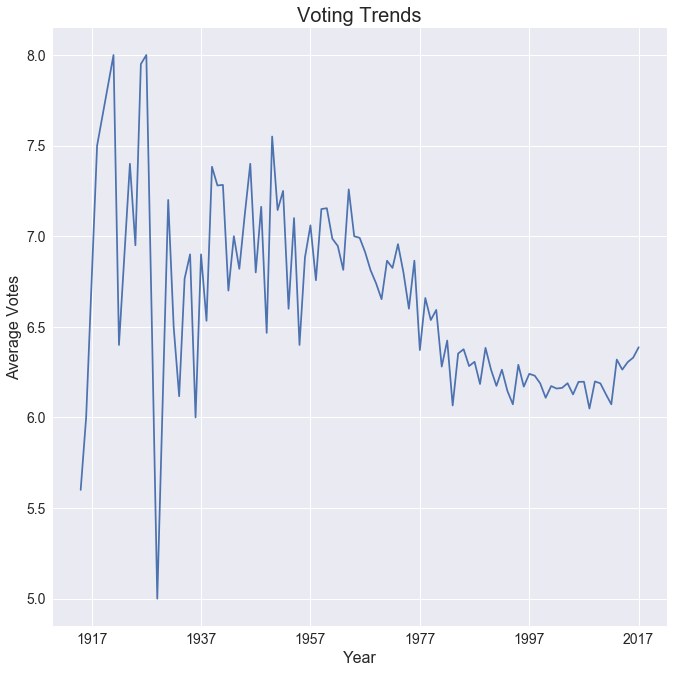

release_date
1915-01-01   5.60
1916-01-01   6.00
1918-01-01   7.50
1921-01-01   8.00
1922-01-01   6.40
1924-01-01   7.40
1925-01-01   6.95
1926-01-01   7.95
1927-01-01   8.00
1928-01-01   6.53
1929-01-01   5.00
1930-01-01   6.10
1931-01-01   7.20
1932-01-01   6.50
1933-01-01   6.12
1934-01-01   6.77
1935-01-01   6.90
1936-01-01   6.00
1937-01-01   6.90
1938-01-01   6.53
1939-01-01   7.38
1940-01-01   7.28
1941-01-01   7.28
1942-01-01   6.70
1943-01-01   7.00
1944-01-01   6.82
1945-01-01   7.12
1946-01-01   7.40
1947-01-01   6.80
1948-01-01   7.16
             ... 
1988-01-01   6.18
1989-01-01   6.38
1990-01-01   6.26
1991-01-01   6.17
1992-01-01   6.26
1993-01-01   6.15
1994-01-01   6.07
1995-01-01   6.29
1996-01-01   6.17
1997-01-01   6.24
1998-01-01   6.23
1999-01-01   6.19
2000-01-01   6.11
2001-01-01   6.17
2002-01-01   6.16
2003-01-01   6.16
2004-01-01   6.19
2005-01-01   6.13
2006-01-01   6.20
2007-01-01   6.20
2008-01-01   6.05
2009-01-01   6.20
2010-01-01   6.19
2011-01-01   6.

In [29]:
#How do the average votes change with the years?

df_group2 = df_movie_fixed.groupby([df_movie_fixed['release_date'].dt.to_period('Y')])['vote_average'].mean()

# chart
df_group2.index = df_group2.index.to_timestamp()
plt.title('Voting Trends', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Average Votes', fontsize=16)
plt.plot(df_group2.index, df_group2.values, '-')
plt.show()

# table
df_group2

There seems to have been a steady decline until 2014, where it is rising very slightly

# Number of Votes as years progress - Descriptive


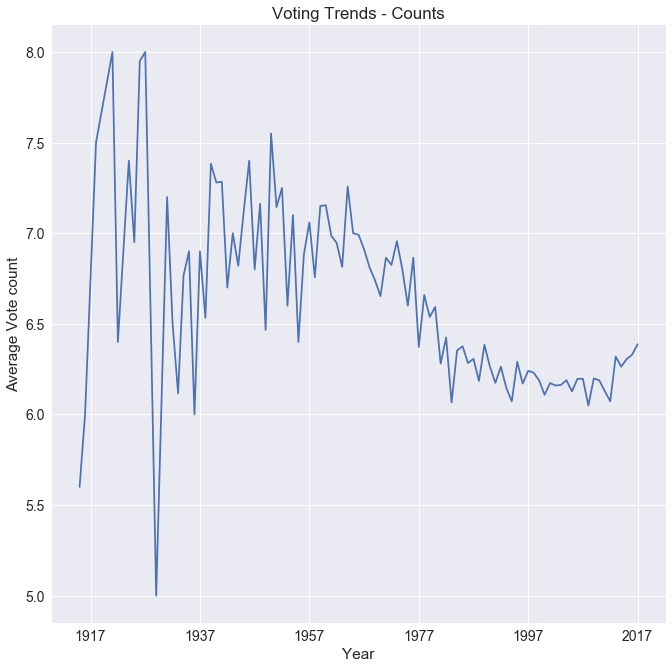

release_date
1915-01-01      120.00
1916-01-01        7.00
1918-01-01        8.00
1921-01-01      404.00
1922-01-01       10.00
1924-01-01       37.00
1925-01-01      361.00
1926-01-01       20.00
1927-01-01      668.00
1928-01-01       11.00
1929-01-01       20.00
1930-01-01       19.00
1931-01-01     1002.00
1932-01-01       67.00
1933-01-01      459.00
1934-01-01      385.00
1935-01-01      182.00
1936-01-01       88.00
1937-01-01     1973.00
1938-01-01      255.00
1939-01-01     3248.00
1940-01-01     3353.00
1941-01-01     3148.00
1942-01-01     3073.00
1943-01-01       30.00
1944-01-01      612.00
1945-01-01      436.00
1946-01-01     1634.00
1947-01-01       48.00
1948-01-01     1443.00
                ...   
1988-01-01    24201.00
1989-01-01    30199.00
1990-01-01    35307.00
1991-01-01    27316.00
1992-01-01    30242.00
1993-01-01    36933.00
1994-01-01    60732.00
1995-01-01    56608.00
1996-01-01    42460.00
1997-01-01    73296.00
1998-01-01    64818.00
1999-01-01    86973.0

In [30]:
#To Qualify the above, it is worth seeing if the vote_counts has changed over the years!
# What is the vote count as years go by

df_group3 = df_movie_fixed.groupby([df_movie_fixed['release_date'].dt.to_period('Y')])['vote_count'].sum()

# chart
df_group3.index = df_group3.index.to_timestamp()
plt.title('Voting Trends - Counts')
plt.xlabel('Year')
plt.ylabel('Average Vote count')
plt.plot(df_group2.index, df_group2.values, '-')
plt.show()

# table
df_group3


As you can see, the count of votes has also increased for the years with later releases. So we can not conclude necessarily
that movies of earlier times were better. 2 votes of 10, are not necessarily better than 40 votes of 8. There also seems to be quite a bit of variance in the first few years. It would be insightful to see the number of movies for those years for which data was collected.

In [31]:
#Count by Release Date
df_movie_fixed_releasedate_check=df_movie_fixed.groupby(by=[df_movie_fixed['release_date'].dt.to_period('Y')])['title'].count()
# sort = df_movie_fixed_releasedate_check.sort_values(df_movie_fixed_releasedate_check.columns[0], ascending = False)
# df_movie_fixed_releasedate_check=df_movie_fixed_releasedate_check.sort_keys(ascending=False)
# print(df_movie_fixed_releasedate_check.head())

print(df_movie_fixed_releasedate_check.head(15))
print(df_movie_fixed_releasedate_check.tail(15))

release_date
1915    2
1916    1
1918    2
1921    1
1922    1
1924    1
1925    4
1926    2
1927    2
1928    3
1929    1
1930    1
1931    4
1932    1
1933    6
Freq: A-DEC, Name: title, dtype: int64
release_date
2003    135
2004    169
2005    181
2006    208
2007    192
2008    196
2009    205
2010    225
2011    229
2012    198
2013    213
2014    204
2015    204
2016    247
2017     70
Freq: A-DEC, Name: title, dtype: int64


So we can see, where there is a dip in the beggining, there are only a handful of movies that were considered, so the addition of even one or two movies, considerably moves the averages. That is why in the early years, there is qutie a bit of variation. We see also, that towards the recent years, there are many movies, so the trends are more constant. And the dip in 2017 also makes sense as we only have data of about 70 movies.

# Does language have a correlation with revenue?

Correlation:          revenue
revenue     1.00


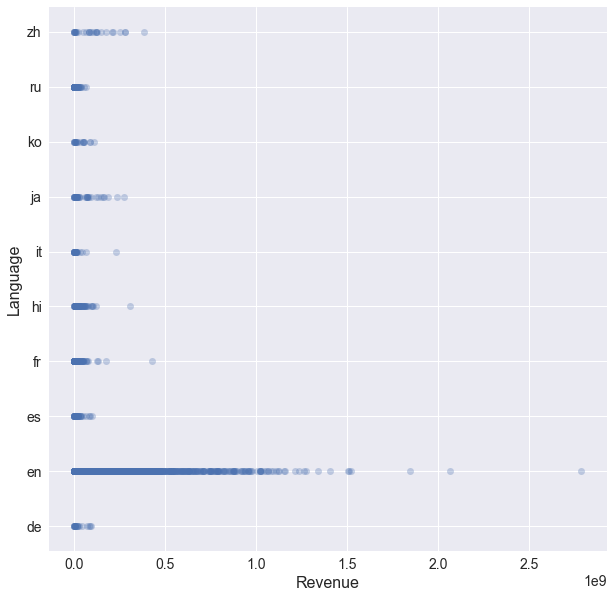

In [32]:
# Is the language a good indicator of revenue?

# Analysis
print('Correlation:', df_movie_fixed[['revenue', 'original_language']].corr())

# Chart
plt.figure(figsize=(10,10))
plt.xlabel('Revenue', fontsize=16)
plt.ylabel('Language', fontsize=16)
plt.plot(df_movie_fixed['revenue'], df_movie_fixed['original_language'], 'o', alpha=0.3)
plt.show()

English movies seem to have the highest revenues. That is not a surprise really. Most English movies are from USA where the currency value is higher than many of the other countries where the other language films are produced.

# Does a higher TMDB popularity mean a higer revenue? DIAGNOSTIC

Correlation:             revenue  popularity
revenue        1.00        0.44
popularity     0.44        1.00


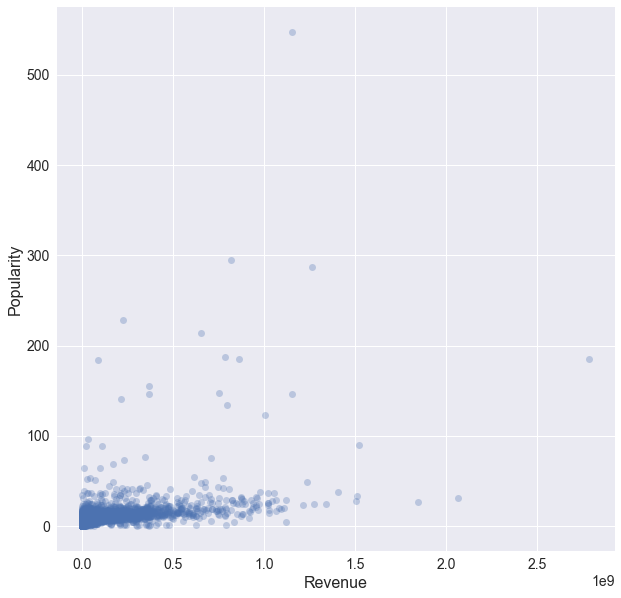

In [33]:
print('Correlation:', df_movie_fixed[['revenue', 'popularity']].corr())

# Chart
plt.figure(figsize=(10,10))
plt.xlabel('Revenue', fontsize=16)
plt.ylabel('Popularity', fontsize=16)
plt.plot(df_movie_fixed['revenue'], df_movie_fixed['popularity'], 'o', alpha=0.3)
plt.show()

Surprisingly the correlation between popularity on TMDB is not a fair indicator of a higher revenue. Let us try and see and see if we can do a further analysis on this below. Firstly, from the chart above, we can see that anything with popularity over 200, does not have a corresponding high revnue. It would be interesting to see what these movies have in common.


In [34]:
df_movie_popularity_analysis=df_movie_fixed[(df_movie_fixed['popularity'] >= 200)]

df_movie_popularity_analysis


,budget,genres,movieId,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,keywords
22704,165000000.00,"['Adventure', 'Family', 'Animation', 'Action',...",177572,en,Big Hero 6,213.85,"['Walt Disney Pictures', 'Walt Disney Animatio...",['United States of America'],2014-10-24,652105443.00,102.00,Big Hero 6,7.80,6289.00,"['brother brother relationship', 'hero', 'tale..."
28454,74000000.00,"['Family', 'Animation', 'Adventure', 'Comedy']",211672,en,Minions,547.49,"['Universal Pictures', 'Illumination Entertain...",['United States of America'],2015-06-17,1156730962.00,91.00,Minions,6.40,4729.00,"['assistant', 'aftercreditsstinger', 'duringcr..."
30879,149000000.00,"['Action', 'Adventure', 'Fantasy']",297762,en,Wonder Woman,294.34,"['Dune Entertainment', 'Atlas Entertainment', ...",['United States of America'],2017-05-30,820580447.00,141.00,Wonder Woman,7.20,5025.00,"['dc comics', 'hero', 'greek mythology', 'isla..."
39259,160000000.00,"['Family', 'Fantasy', 'Romance']",321612,en,Beauty and the Beast,287.25,"['Walt Disney Pictures', 'Mandeville Films']","['United Kingdom', 'United States of America']",2017-03-16,1262886337.00,129.00,Beauty and the Beast,6.80,5530.00,"['france', 'magic', 'castle', 'fairy tale', 'm..."
40493,34000000.00,"['Action', 'Crime']",339403,en,Baby Driver,228.03,"['Big Talk Productions', 'TriStar Pictures', '...","['United Kingdom', 'United States of America']",2017-06-28,224511319.00,113.00,Baby Driver,7.20,2083.00,"['robbery', 'atlanta', 'music', 'crime boss', ..."


In [35]:
print(df_movie_popularity_analysis.shape)

(5, 15)


So we see that all these movies are English movies, and mostly family movies geared for children. And some also have production companies such as Walt Disney in Common in common. They have been released in the last 5 years, in the USA. Below is a list of the production companies. 

In [36]:
pd.set_option('display.max_colwidth', -1)
print(df_movie_popularity_analysis['production_companies'])

22704    ['Walt Disney Pictures', 'Walt Disney Animation Studios']                                                                                       
28454    ['Universal Pictures', 'Illumination Entertainment']                                                                                            
30879    ['Dune Entertainment', 'Atlas Entertainment', 'Warner Bros.', 'DC Entertainment', 'Cruel & Unusual Films', 'TENCENT PICTURES', 'Wanda Pictures']
39259    ['Walt Disney Pictures', 'Mandeville Films']                                                                                                    
40493    ['Big Talk Productions', 'TriStar Pictures', 'Media Rights Capital', 'Working Title Films', 'Double Negative']                                  
Name: production_companies, dtype: object


# Lastly, is budget a fair indicator of a higher revenue? DIAGNOSTIC

Correlation:          revenue  budget
revenue 1.00     0.73   
budget  0.73     1.00   


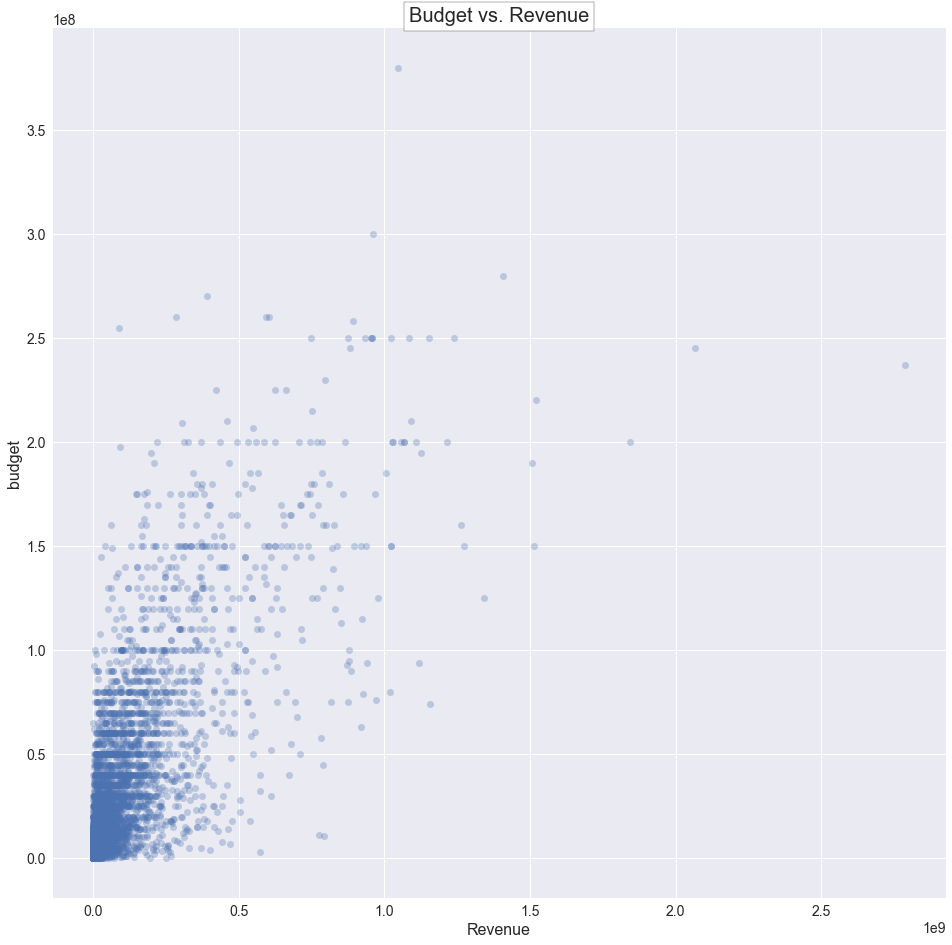

In [37]:
print('Correlation:', df_movie_fixed[['revenue', 'budget']].corr())

# Chart
plt.figure(figsize=(16,16))
plt.title("Budget vs. Revenue", bbox={'facecolor':'1', 'pad':5}, fontsize=20)
plt.xlabel('Revenue', fontsize=16)
plt.ylabel('budget', fontsize=16 )
plt.plot(df_movie_fixed['revenue'], df_movie_fixed['budget'], 'o', alpha=0.3)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()


Yes! higher budget movies do tend to have a higher revenue

# Which Genre are the highest revenue movies? DIAGNOSTIC

In [38]:
# top 100 Revenue Movies
top_movies=df_movie_fixed.sort_values('revenue',ascending=False).head(100)
top_movies.head()

,budget,genres,movieId,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,keywords
13784,237000000.00,"['Action', 'Adventure', 'Fantasy', 'Science Fiction']",19995,en,Avatar,185.07,"['Ingenious Film Partners', 'Twentieth Century Fox Film Corporation', 'Dune Entertainment', 'Lightstorm Entertainment']","['United States of America', 'United Kingdom']",2009-12-10,2787965087.00,162.00,Avatar,7.20,12114.00,"['culture clash', 'future', 'space war', 'space colony', 'society', 'space travel', 'futuristic', 'romance', 'space', 'alien', 'tribe', 'alien planet', 'cgi', 'marine', 'soldier', 'battle', 'love affair', 'anti war', 'power relations', 'mind and soul', '3d']"
24678,245000000.00,"['Action', 'Adventure', 'Science Fiction', 'Fantasy']",140607,en,Star Wars: The Force Awakens,31.63,"['Lucasfilm', 'Truenorth Productions', 'Bad Robot']",['United States of America'],2015-12-15,2068223624.00,136.00,Star Wars: The Force Awakens,7.50,7993.00,"['android', 'spaceship', 'jedi', 'imax', 'space opera', '3d']"
1594,200000000.00,"['Drama', 'Romance', 'Thriller']",597,en,Titanic,26.89,"['Paramount Pictures', 'Twentieth Century Fox Film Corporation', 'Lightstorm Entertainment']",['United States of America'],1997-11-18,1845034188.00,194.00,Titanic,7.50,7770.00,"['shipwreck', 'iceberg', 'ship', 'panic', 'titanic', 'ocean liner', 'epic', 'rich woman - poor man', 'love', 'disaster', 'tragic love', 'class differences', 'imax', 'star crossed lovers', 'steerage', 'salvage', 'rich snob', '3d', '1910s']"
16689,220000000.00,"['Science Fiction', 'Action', 'Adventure']",24428,en,The Avengers,89.89,"['Paramount Pictures', 'Marvel Studios']",['United States of America'],2012-04-25,1519557910.00,143.00,The Avengers,7.40,12000.00,"['new york', 'shield', 'marvel comic', 'superhero', 'based on comic', 'alien invasion', 'superhero team', 'aftercreditsstinger', 'duringcreditsstinger', 'marvel cinematic universe']"
23281,150000000.00,"['Action', 'Adventure', 'Science Fiction', 'Thriller']",135397,en,Jurassic World,32.79,"['Universal Studios', 'Amblin Entertainment', 'Legendary Pictures', 'Fuji Television Network', 'Dentsu']",['United States of America'],2015-06-09,1513528810.00,124.00,Jurassic World,6.50,8842.00,"['monster', 'dna', 'tyrannosaurus rex', 'velociraptor', 'island', 'sequel', 'suspense', 'disaster', 'escape', 'dinosaur', 'amusement park', 'animal attack', 'theme park', 'jurassic park', '3d', 'animal horror']"


In [39]:
#Splitting words

genres_popular=list(top_movies["genres"].apply(lambda x: x.split(" ")))

#flattening list
genres_popular= [x for y in genres_popular for x in y]


#Making lower case
genres_popular=[x.lower() for x in genres_popular]

#stripping punctuations
import string

genres_popular = [''.join(c for c in s if c not in string.punctuation) for s in genres_popular]

#Getting rid of all spaces
genres_popular = [x for x in genres_popular if x.strip()]

#Using counter to count occurances
genres_popular_count=(Counter(genres_popular).most_common())

for key, value in (genres_popular_count):
    print(key, ":", value)
    

adventure : 80
action : 55
fantasy : 44
family : 35
science : 31
fiction : 31
animation : 20
comedy : 18
thriller : 15
drama : 12
romance : 8
crime : 6
mystery : 3


The most popular genre is actually Adventure! Adventure movies make the most money.